## Project 1 : Global Superstore 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import random
import numpy as np
import csv

In [2]:
# Read the data from the dataset
sstore_df = pd.read_csv('SSClean.csv')
sstore_df.head()

,Order Date,Segment,Country,Category,Sales,Quantity,Discount,Profit,Shipping Cost
0,2012-07-31,Consumer,United States,Technology,2309.650,7,0.0,762.1845,933.57
1,2013-05-02,Corporate,Australia,Furniture,3709.395,9,0.1,-288.7650,923.63
2,2013-10-17,Consumer,Australia,Technology,5175.171,9,0.1,919.9710,915.49
3,2013-01-28,Home Office,Germany,Technology,2892.510,5,0.1,-96.5400,910.16
4,2013-05-11,Consumer,Senegal,Technology,2832.960,8,0.0,311.5200,903.04


# 1. Categorical analysis using Chi-Square
### Null Hypothesis: No statistical significance exists in the distribution of the orders placed by the three segments: corporate, consumers and home office. 

In [3]:
#Observed data for the 3 segments from the dataset.
observed_segment_data = sstore_df['Segment'].value_counts()
observed_segment_data

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

In [4]:
#Creating a dataframe for the observed data.
chi_square_df = pd.DataFrame([observed_segment_data]).T
chi_square_df

,Segment
Consumer,26518
Corporate,15429
Home Office,9343


In [5]:
#Adding a column whose default values are the expected values. 
chi_square_df[1] = 25000
chi_square_df

,Segment,1
Consumer,26518,25000
Corporate,15429,25000
Home Office,9343,25000


In [6]:
#Renaming the columns.
chi_square_df.columns = ["Observed", "Expected"]
chi_square_df

,Observed,Expected
Consumer,26518,25000
Corporate,15429,25000
Home Office,9343,25000


In [7]:
# The degree of freedom is 3-1 = 2
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = st.chi2.ppf(q = 0.95, df = 2)

In [8]:
# Displaying the critical value.
critical_value

5.991464547107979

In [9]:
# Run the chi square test with stats.chisquare()
st.chisquare(chi_square_df['Observed'], chi_square_df['Expected'])

Power_divergenceResult(statistic=13562.00056, pvalue=0.0)

### Conclusion : Since the chi-square value at a confidence level of 95% exceeds the critical value of 5.99, we conclude that the differences seen in the number of orders per segment are statistically significant.

# 2. Correlation between Profits and other factors such as Discounts, Sales, Quantity and Shipping cost across Regions

In [10]:
#Extracting the series of Discounts on orders and the corresponding Profit/Loss.
discounts = sstore_df['Discount']
profits = sstore_df['Profit']

def clean(serie):
    output = serie[(np.isnan(serie) == False) & (np.isinf(serie) == False)]
    return output

discount = clean(discounts)
profit = clean(profits)

The correlation between the factors, discounts and profits is -0.32


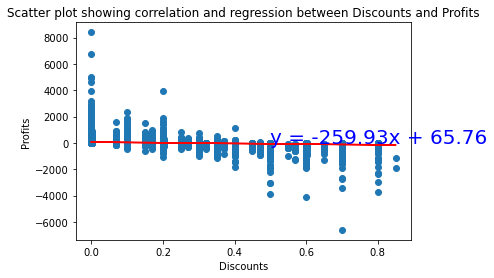

In [11]:
#Calculation of correlation between discounts and profits.
from scipy.stats import linregress
correlation = st.pearsonr(discount,profit) 
plt.scatter(discounts,profits)
plt.title('Scatter plot showing correlation and regression between Discounts and Profits')
plt.xlabel('Discounts')
plt.ylabel('Profits')
(slope, intercept, rvalue, pvalue, stderr) = linregress(discounts, profits)
regress_values = discounts * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.plot(discounts,regress_values,"r-")
plt.annotate(line_eq,(0.5,10),fontsize=20,color='blue')
print(f'The correlation between the factors, discounts and profits is {round(correlation[0],2)}')

In [12]:
#Extracting the series of Sales and the corresponding Profit/Loss.
sales = sstore_df['Sales']
profits = sstore_df['Profit']

The correlation between the factors, sales and profits is 0.48


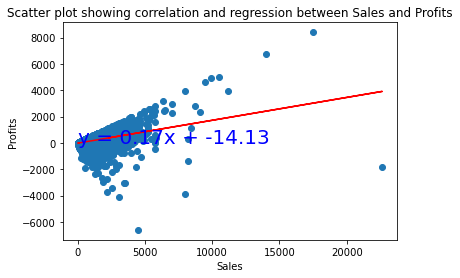

In [13]:
#Calculation of correlation between sales and profits.
from scipy.stats import linregress
correlation = st.pearsonr(sales,profits)
plt.scatter(sales,profits)
plt.title('Scatter plot showing correlation and regression between Sales and Profits')
plt.xlabel('Sales')
plt.ylabel('Profits')
(slope, intercept, rvalue, pvalue, stderr) = linregress(sales, profits)
regress_values = sales * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.plot(sales,regress_values,"r-")
plt.annotate(line_eq,(0.5,10),fontsize=20,color='blue')
print(f'The correlation between the factors, sales and profits is {round(correlation[0],2)}')

In [14]:
#Extracting the series of Quantity and the corresponding Profit/Loss.
quantity = sstore_df['Quantity']
profits = sstore_df['Profit']

The correlation between the factors, quantity and profits is 0.1


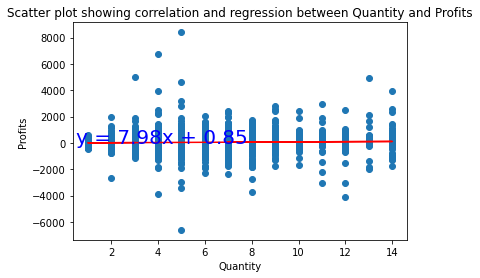

In [15]:
#Calculation of correlation between sales and profits.
from scipy.stats import linregress
correlation = st.pearsonr(quantity,profits)
plt.scatter(quantity,profits)
plt.title('Scatter plot showing correlation and regression between Quantity and Profits')
plt.xlabel('Quantity')
plt.ylabel('Profits')
(slope, intercept, rvalue, pvalue, stderr) = linregress(quantity, profits)
regress_values = quantity * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.plot(quantity,regress_values,"r-")
plt.annotate(line_eq,(0.5,10),fontsize=20,color='blue')
print(f'The correlation between the factors, quantity and profits is {round(correlation[0],2)}')

In [16]:
#Extracting the series of Shipping cost and the corresponding Profit/Loss.
shipping = sstore_df['Shipping Cost']
profits = sstore_df['Profit']

The correlation between the factors, shipping and profits is 0.35


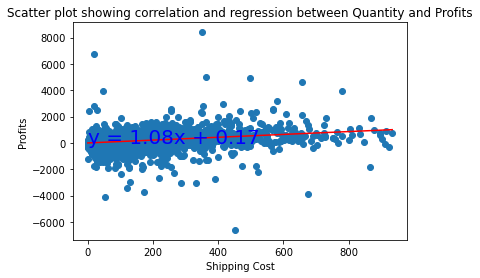

In [17]:
#Calculation of correlation between sales and profits.
from scipy.stats import linregress
correlation = st.pearsonr(shipping,profits)
plt.scatter(shipping,profits)
plt.title('Scatter plot showing correlation and regression between Quantity and Profits')
plt.xlabel('Shipping Cost')
plt.ylabel('Profits')
(slope, intercept, rvalue, pvalue, stderr) = linregress(shipping, profits)
regress_values = shipping * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.plot(shipping,regress_values,"r-")
plt.annotate(line_eq,(0.5,10),fontsize=20,color='blue')
print(f'The correlation between the factors, shipping and profits is {round(correlation[0],2)}')

### Conclusion: 
* The correlation coefficient between profits and discounts is -0.32.
* The correlation coefficient between profits and sales is 0.48.
* The correlation coefficient between profits and quantity is 0.1.
* The correlation coefficient between profits and shipping cost is 0.35.
    The correlation coefficient of -1 indicates perfect negative correlation, 1 indicates perfect positive correlation, and 0 indicates no correlation. The results indicate that there is no significant relation between profits and discounts, quantity and shipping cost. However, there is slight positive correlation between sales and the profits.

# 3. Yearly analysis of sales

In [18]:
#Extracting the columns of the dataframe
sstore_df.columns

Index(['Order Date', 'Segment', 'Country', 'Category', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost'],
      dtype='object')

In [19]:
#Defining thwe specific columns for the dataframe for yearly analysis
df = sstore_df[['Order Date','Sales','Quantity','Segment','Category','Profit','Country']].copy()

In [20]:
#Formatting the date for the column, Order Date
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year']= df['Order Date'].dt.year
df

,Order Date,Sales,Quantity,Segment,Category,Profit,Country,Year
0,2012-07-31,2309.650,7,Consumer,Technology,762.1845,United States,2012
1,2013-05-02,3709.395,9,Corporate,Furniture,-288.7650,Australia,2013
2,2013-10-17,5175.171,9,Consumer,Technology,919.9710,Australia,2013
3,2013-01-28,2892.510,5,Home Office,Technology,-96.5400,Germany,2013
4,2013-05-11,2832.960,8,Consumer,Technology,311.5200,Senegal,2013
...,...,...,...,...,...,...,...,...
51285,2014-06-19,65.100,5,Corporate,Office Supplies,4.5000,Japan,2014
51286,2014-06-20,0.444,1,Consumer,Office Supplies,-1.1100,United States,2014
51287,2013-02-12,22.920,3,Home Office,Office Supplies,11.2308,United States,2013
51288,2012-02-18,13.440,2,Home Office,Office Supplies,2.4000,Brazil,2012


In [21]:
#Creating dataframe with the grouped year data
group_year = df.groupby('Year').sum().iloc[0:4]
group_year

,Sales,Quantity,Profit
Year,,,
2011,2.259451e+06,31443,248940.81154
2012,2.677439e+06,38111,307415.27910
2013,3.405746e+06,48136,406935.23018
2014,4.299866e+06,60622,504165.97046


In [22]:
#Calculating percentage increase of sales and profit from 2011 to 2014
percent_sales = (group_year.iloc[3,0]-group_year.iloc[0,0])/group_year.iloc[0,0] *100
percent_sales_float = "{:.2f}".format(percent_sales)
percent_profit = (group_year.iloc[3,2]-group_year.iloc[0,2])/group_year.iloc[0,2] *100
percent_profit_float = "{:.2f}".format(percent_profit)

In [23]:
print(f'Percentage increase in Sales from 2011 to 2014 is {percent_sales_float}%')
print(f'Percentage increase in Profit from 2011 to 2014 is {percent_profit_float}%')

Percentage increase in Sales from 2011 to 2014 is 90.31%
Percentage increase in Profit from 2011 to 2014 is 102.52%


Text(0, 0.5, 'Total Sales')

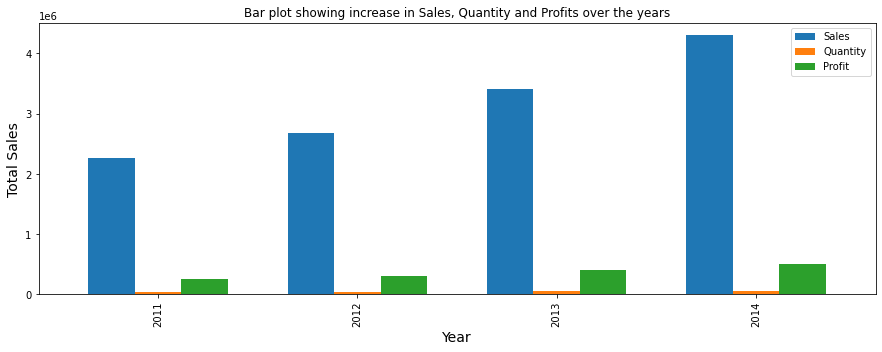

In [24]:
#Bar plot to show the increase in Sales, Quantity and Profits over the years
by_year = group_year.plot(kind='bar', width=.7, align = 'center', figsize = (15,5))
by_year.set_xlabel("Year", size = 14)
by_year.set_ylabel("Total Sales", size = 14)
plt.xticks(rotation=90)
plt.title('Bar plot showing increase in Sales, Quantity and Profits over the years')
plt.xlabel('Year')
plt.ylabel('Total Sales')

### Conclusion: The sales revenue surpassed $4million in 2014, a 90.31% increase from 2011. The percentage increase in Profit since 2011 to 2014 is 102.52%.

# 4. Analysis of Sales per country, top 5 countries with largest demand and sales volume summary

In [25]:
#Extracting the columns for reference
sstore_df.columns

Index(['Order Date', 'Segment', 'Country', 'Category', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost'],
      dtype='object')

In [26]:
#Sales per country
group_region = sstore_df.groupby(['Country'])
sales_df = pd.DataFrame(group_region['Sales'].sum())
sorted_df = sales_df.sort_values('Sales',ascending = False)
sorted_df

,Sales
Country,
United States,2.297201e+06
Australia,9.252359e+05
France,8.589311e+05
China,7.005620e+05
Germany,6.288400e+05
...,...
Tajikistan,2.427840e+02
Macedonia,2.096400e+02
Eritrea,1.877400e+02


In [27]:
#Filtering top 5 countries
filtered_df = sorted_df.iloc[0:5,:]
filtered_df.reset_index()

,Country,Sales
0,United States,2.297201e+06
1,Australia,9.252359e+05
2,France,8.589311e+05
3,China,7.005620e+05
4,Germany,6.288400e+05


Text(0.5, 1.0, 'Bar plot showing the top 5 countries with highest sales')

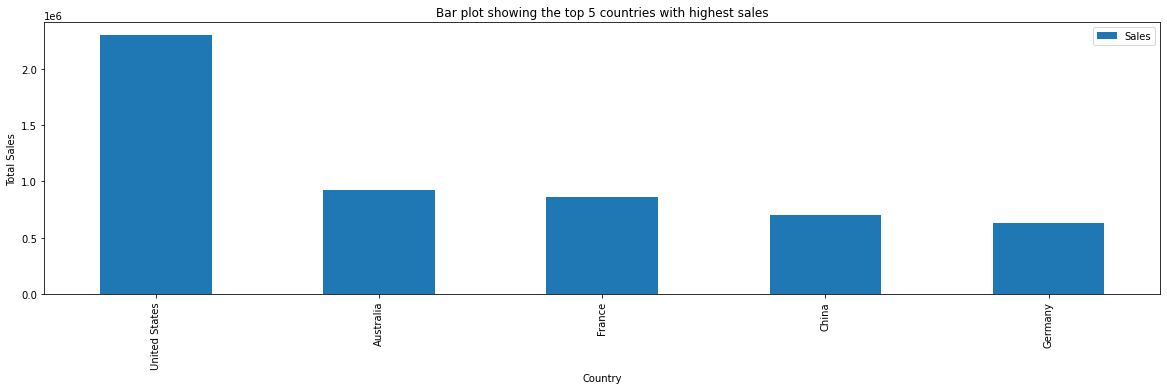

In [28]:
#Bar plot for top 5 sales vs. Country
sales_chart = filtered_df.plot(kind='bar', align = 'center', figsize = (20,5) )
sales_chart.set_xlabel("Country")
sales_chart.set_ylabel("Total Sales")
plt.title('Bar plot showing the top 5 countries with highest sales')

In [29]:
## Binning data for analyzing volume of sales as low, medium and high

bins = [0,5,10,15]
labels = ['Low','Medium','High']
sstore_df['Sales Volume Summary']=pd.cut(sstore_df['Quantity'], bins, labels=labels, include_lowest = True)
sstore_df

,Order Date,Segment,Country,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Sales Volume Summary
0,2012-07-31,Consumer,United States,Technology,2309.650,7,0.0,762.1845,933.57,Medium
1,2013-05-02,Corporate,Australia,Furniture,3709.395,9,0.1,-288.7650,923.63,Medium
2,2013-10-17,Consumer,Australia,Technology,5175.171,9,0.1,919.9710,915.49,Medium
3,2013-01-28,Home Office,Germany,Technology,2892.510,5,0.1,-96.5400,910.16,Low
4,2013-05-11,Consumer,Senegal,Technology,2832.960,8,0.0,311.5200,903.04,Medium
...,...,...,...,...,...,...,...,...,...,...
51285,2014-06-19,Corporate,Japan,Office Supplies,65.100,5,0.0,4.5000,0.01,Low
51286,2014-06-20,Consumer,United States,Office Supplies,0.444,1,0.8,-1.1100,0.01,Low
51287,2013-02-12,Home Office,United States,Office Supplies,22.920,3,0.0,11.2308,0.01,Low
51288,2012-02-18,Home Office,Brazil,Office Supplies,13.440,2,0.0,2.4000,0.00,Low


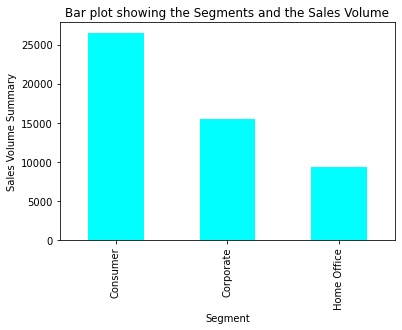

<Figure size 432x288 with 0 Axes>

In [30]:
#Sales volume summary and Segment and Category
segment_group= sstore_df.groupby(['Segment'])
total_volume = segment_group['Sales Volume Summary'].count()
volume_chart = total_volume.plot(kind='bar', color = 'cyan')
volume_chart.set_xlabel("Segment")
volume_chart.set_ylabel("Sales Volume Summary")
plt.title('Bar plot showing the Segments and the Sales Volume')
plt.show()
plt.tight_layout()

Category
Furniture          4.110874e+06
Office Supplies    3.787070e+06
Technology         4.744557e+06
Name: Sales, dtype: float64


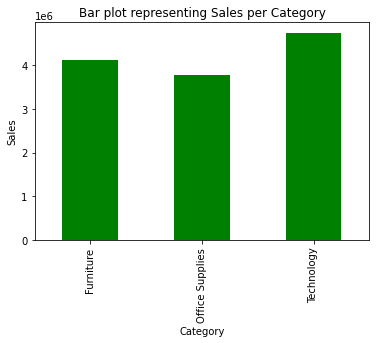

<Figure size 432x288 with 0 Axes>

In [31]:
category_group = sstore_df.groupby(['Category'])
total_sales = category_group['Sales'].sum()
print(total_sales)
sales_ch = total_sales.plot(kind='bar', color = 'green')
sales_ch.set_xlabel("Category")
sales_ch.set_ylabel("Sales")
plt.title('Bar plot representing Sales per Category')
plt.show()
plt.tight_layout()

### Conclusion: Global Superstore's largest demand comes from the U.S, Australia, France, China and Germany. The segment that is contributing to the highest sales is the Consumer market, followed by Corporate and Home office. The product category that has resulted in highest sales over the years is Technology, followed by Furniture and Office supplies.